# Análisis exploratorio del dataset de revisiones técnico mecánicas

## Grupo

* Luis Alejandro Mongua López [lamongual@unal.edu.co](lamongual@unal.edu.co)
* Ivanhoe Rozo Rojas [irozor@unal.edu.co](irozor@unal.edu.co)
* Camilo Alfonso Mosquera Benavides [camosquerab@unal.edu.co](camosquerab@unal.edu.co)

## Descripción general del dataset

El dataset corresponde a los resultados de las revisiones técnico-mecánicas de vehículos automotores livianos y motocicletas en un CDA (Centro de Diagnóstico Automotor) en la ciudad de Bogotá entre los años 2014 y 2022, incluye algunos valores cualitativos y otros cuantitativos. La cantidad de registros se estima en 300.000, organizados en 133 variables. 

Es de anotar que la normativa y los criterios de auditoría han cambiado durante el transcurso de los años en los que la muestra es tomada, por lo que algunas columnas pueden no contener valores antes de una fecha determinada. También hay que tener en cuenta que algunos datos no aplican para algunos tipos de vehículo, por ejemplo, las motocicletas no cuentan con valores cuantitativos del estado de la suspensión, y los vehículos que funcionan con combustible diesel no tienen valores en los campos de emisiones de HC, CO, CO2 ni O2 (sus emisiones se miden en porcentaje de opacidad)

Los datos fueron extraídos de la base de datos de inspecciones de un CDA y fueron anonimizados para no violar las políticas de privacidad y protección de datos personales.

Primero montamos el drive para poder acceder al archivo csv con los datos

In [1]:
# Montar el drive para poder acceder al archivo del dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Posteriormente importamos todas las librerías necesarias

In [2]:
# Importaciones y setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline

A continuación se importa el dataset

Nota posterior: Se verifica primero si ya existen datos preprocesados, si es así entonces se importa el dataset pre-procesado

In [3]:
df = pd.read_hdf('/content/drive/Shareddrives/Data_mining/dataset.hdf')
df

,adherencia__eje1__de,adherencia__eje1__iz,adherencia__eje2__de,adherencia__eje2__iz,desviacion_lateral__eje1,desviacion_lateral__eje2,frenos__eficacia_total,frenos__eficacia_auxiliar,frenos__desequilibrio_eje_1,frenos__desequilibrio_eje_2,...,combustible,marca,linea,kilometraje,tipo_motor,tipo_revision_id,codigo_resultado,secuencia,fecha_inicio,fecha_fin
8117952,NaN,NaN,NaN,NaN,-0.41,-0.25,62.0,25.7,16.10,22.2,...,DIESEL,HINO,10812,146286,DIESEL,3,1,1,2021-01-29 13:33:08-05:00,2021-01-29 14:48:44-05:00
913054,67.8,62.2,87.2,78.4,-0.01,-0.01,64.3,13.1,20.30,19.1,...,GASOLINA,KIA,CERATO PRO EX,82100,OTTO,1,1,1,2022-01-14 07:34:09-05:00,2022-01-14 08:20:35-05:00
2217068,NaN,NaN,NaN,NaN,NaN,NaN,63.2,NaN,NaN,NaN,...,GASOLINA,HONDA,BIZ 125,0,4T,4,1,2,2022-07-28 11:07:04-05:00,2022-07-28 11:48:48-05:00
898636,NaN,NaN,NaN,NaN,NaN,NaN,89.8,NaN,NaN,NaN,...,GASOLINA,SUZUKI,BEST 125,55165,4T,4,1,2,2017-12-15 13:52:01-05:00,2017-12-15 14:01:02-05:00
3761017,77.5,52.6,52.3,73.5,0.00,0.00,18.5,9.6,23.70,26.4,...,GASOLINA,LAND ROVER,109,20573,,1,2,1,2019-12-28 07:51:25-05:00,2019-12-28 09:59:17-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781047,NaN,NaN,NaN,NaN,NaN,NaN,74.7,NaN,NaN,NaN,...,GASOLINA,KYMCO,UNI-K 110,1,4T,4,1,2,2021-09-03 09:08:45-05:00,2021-09-03 09:33:17-05:00
1673841,67.1,76.3,45.8,61.8,-0.87,-11.90,62.5,9.9,0.18,4.5,...,GASOLINA,CHEVROLET,OPTRA,138677,OTTO,1,1,1,2021-11-10 10:49:40-05:00,2021-11-10 11:39:10-05:00
6354895,NaN,NaN,NaN,NaN,NaN,NaN,86.6,NaN,NaN,NaN,...,GASOLINA,HONDA,CB 160F STD,38500,4T,4,1,1,2020-11-20 08:53:54-05:00,2020-11-20 10:09:57-05:00
6236540,51.3,71.7,72.5,77.7,1.70,0.30,70.5,16.9,22.50,7.1,...,DIESEL,NISSAN,UP 720,352987,,1,1,1,2020-06-16 14:54:18-05:00,2020-06-16 16:45:37-05:00


## Limpieza de datos

Como los datos vienen de un CSV, se encuentra que algunas columnas están como "string" cuando deberían ser float, int o bool, así que se hace una limpieza de datos de acuerdo al tipo de dato.

Conociendo la naturaleza de los datos, se organizan los siguientes arrays:

In [4]:
DATOS_FLOAT = [
    'adherencia__eje1__de',
    'adherencia__eje1__iz',
    'adherencia__eje2__de',
    'adherencia__eje2__iz',
    'desviacion_lateral__eje1',
    'desviacion_lateral__eje2',
    'frenos__eficacia_total',
    'frenos__eficacia_auxiliar',
    'frenos__desequilibrio_eje_1',
    'frenos__desequilibrio_eje_2',
    'gases__opacidad_promedio',
    'gases__ralenti__co',
    'gases__ralenti__co2',
    'gases__ralenti__o2',
    'gases__ralenti__hc',
    'luces__intensidad__total',
    'taxi__error_distancia',
    'taxi__error_tiempo',
    'profundidad_minima',
    'luces__inclinacion__baja1_de',
    'luces__inclinacion__baja1_iz',
    'luces__intensidad__baja1_de',
    'luces__intensidad__baja1_iz',
]

DATOS_OBJECT = [
    'combustible',
    'marca',
    'linea',
    'tipo_revision_id',
    'fecha_inicio',
    'fecha_fin',
]



Ahora se cambia el tipo de dato de cada columna según corresponda

In [5]:
# Tipos de datos flotantes:
for column_name in DATOS_FLOAT:
  df[column_name] = df[column_name].replace('', np.nan)
  print(column_name, list(df[column_name].unique())[0:10], len(list(df[column_name].unique())), "valores distintos")
  df[column_name] = df[column_name].astype('float')

adherencia__eje1__de [nan, 67.8, 77.5, 89.5, 61.6, 87.6, 74.9, 23.2, 46.2, 74.1] 7583 valores distintos
adherencia__eje1__iz [nan, 62.2, 52.6, 91.8, 68.6, 86.3, 69.8, 67.9, 67.6, 77.6] 7578 valores distintos
adherencia__eje2__de [nan, 87.2, 52.3, 72.8, 72.2, 73.9, 56.2, 84.6, 60.2, 59.0] 7534 valores distintos
adherencia__eje2__iz [nan, 78.4, 73.5, 75.5, 49.6, 82.1, 58.6, 66.5, 48.6, 74.6] 7566 valores distintos
desviacion_lateral__eje1 [-0.41, -0.01, nan, 0.0, 0.4, 3.4, 0.1, -10.9, -0.3, 0.2] 9513 valores distintos
desviacion_lateral__eje2 [-0.25, -0.01, nan, 0.0, -2.6, 0.4, -4.5, -2.72, 4.9, 0.3] 14800 valores distintos
frenos__eficacia_total [62.0, 64.3, 63.2, 89.8, 18.5, 68.4, 65.5, 57.7, 75.5, 60.4] 10105 valores distintos
frenos__eficacia_auxiliar [25.7, 13.1, nan, 9.6, 26.6, 34.1, 30.5, 13.7, 0.0, 25.2] 7001 valores distintos
frenos__desequilibrio_eje_1 [16.1, 20.3, nan, 23.7, 9.4, 6.6, 16.8, 10.7, 29.3, 13.5] 5942 valores distintos
frenos__desequilibrio_eje_2 [22.2, 19.1, nan, 

Se encuentra que algunas columnas no contienen información relevante, así que se eliminan para limpiar el dataset

In [6]:
df.head()

,adherencia__eje1__de,adherencia__eje1__iz,adherencia__eje2__de,adherencia__eje2__iz,desviacion_lateral__eje1,desviacion_lateral__eje2,frenos__eficacia_total,frenos__eficacia_auxiliar,frenos__desequilibrio_eje_1,frenos__desequilibrio_eje_2,...,combustible,marca,linea,kilometraje,tipo_motor,tipo_revision_id,codigo_resultado,secuencia,fecha_inicio,fecha_fin
8117952,NaN,NaN,NaN,NaN,-0.41,-0.25,62.0,25.7,16.1,22.2,...,DIESEL,HINO,10812,146286,DIESEL,3,1,1,2021-01-29 13:33:08-05:00,2021-01-29 14:48:44-05:00
913054,67.8,62.2,87.2,78.4,-0.01,-0.01,64.3,13.1,20.3,19.1,...,GASOLINA,KIA,CERATO PRO EX,82100,OTTO,1,1,1,2022-01-14 07:34:09-05:00,2022-01-14 08:20:35-05:00
2217068,NaN,NaN,NaN,NaN,NaN,NaN,63.2,NaN,NaN,NaN,...,GASOLINA,HONDA,BIZ 125,0,4T,4,1,2,2022-07-28 11:07:04-05:00,2022-07-28 11:48:48-05:00
898636,NaN,NaN,NaN,NaN,NaN,NaN,89.8,NaN,NaN,NaN,...,GASOLINA,SUZUKI,BEST 125,55165,4T,4,1,2,2017-12-15 13:52:01-05:00,2017-12-15 14:01:02-05:00
3761017,77.5,52.6,52.3,73.5,0.00,0.00,18.5,9.6,23.7,26.4,...,GASOLINA,LAND ROVER,109,20573,,1,2,1,2019-12-28 07:51:25-05:00,2019-12-28 09:59:17-05:00


In [7]:
df.tail()

,adherencia__eje1__de,adherencia__eje1__iz,adherencia__eje2__de,adherencia__eje2__iz,desviacion_lateral__eje1,desviacion_lateral__eje2,frenos__eficacia_total,frenos__eficacia_auxiliar,frenos__desequilibrio_eje_1,frenos__desequilibrio_eje_2,...,combustible,marca,linea,kilometraje,tipo_motor,tipo_revision_id,codigo_resultado,secuencia,fecha_inicio,fecha_fin
1781047,NaN,NaN,NaN,NaN,NaN,NaN,74.7,NaN,NaN,NaN,...,GASOLINA,KYMCO,UNI-K 110,1,4T,4,1,2,2021-09-03 09:08:45-05:00,2021-09-03 09:33:17-05:00
1673841,67.1,76.3,45.8,61.8,-0.87,-11.9,62.5,9.9,0.18,4.5,...,GASOLINA,CHEVROLET,OPTRA,138677,OTTO,1,1,1,2021-11-10 10:49:40-05:00,2021-11-10 11:39:10-05:00
6354895,NaN,NaN,NaN,NaN,NaN,NaN,86.6,NaN,NaN,NaN,...,GASOLINA,HONDA,CB 160F STD,38500,4T,4,1,1,2020-11-20 08:53:54-05:00,2020-11-20 10:09:57-05:00
6236540,51.3,71.7,72.5,77.7,1.70,0.3,70.5,16.9,22.50,7.1,...,DIESEL,NISSAN,UP 720,352987,,1,1,1,2020-06-16 14:54:18-05:00,2020-06-16 16:45:37-05:00
6647837,68.6,68.3,93.0,71.3,-0.08,-19.6,61.1,23.7,25.90,18.5,...,DIESEL,MERCEDES BENZ,GLK 220 CDI 4MATIC,55600,,1,1,1,2021-03-30 09:32:41-05:00,2021-03-30 09:53:19-05:00


In [8]:
df.sample(frac=0.1)._get_numeric_data().describe()

,adherencia__eje1__de,adherencia__eje1__iz,adherencia__eje2__de,adherencia__eje2__iz,desviacion_lateral__eje1,desviacion_lateral__eje2,frenos__eficacia_total,frenos__eficacia_auxiliar,frenos__desequilibrio_eje_1,frenos__desequilibrio_eje_2,...,profundidad_minima,luces__inclinacion__baja1_de,luces__inclinacion__baja1_iz,luces__intensidad__baja1_de,luces__intensidad__baja1_iz,modelo,kilometraje,tipo_revision_id,codigo_resultado,secuencia
count,47606.000000,47606.000000,47606.000000,47606.000000,53059.000000,53059.000000,89426.000000,53514.000000,52360.000000,52358.000000,...,86530.000000,72752.000000,43372.000000,72752.000000,43371.000000,90782.000000,9.078200e+04,90782.000000,90782.000000,90782.000000
mean,73.122553,73.505213,69.780432,69.824672,-0.176749,-0.573348,66.683330,21.284718,9.743286,12.351588,...,3.226712,1.876258,1.870748,19.780106,18.371240,2008.323357,1.451014e+05,2.387301,1.164229,1.160428
std,13.222745,13.202160,13.634074,13.449428,5.863455,5.340197,12.198188,9.702944,7.955054,10.984017,...,1.849569,0.744432,0.728053,162.549362,16.104416,9.396227,3.333807e+06,1.440906,0.370485,0.380822
min,0.000000,0.000000,0.000000,0.000000,-1041.300000,-106.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-15.000000,-15.000000,0.000000,0.000000,1900.000000,0.000000e+00,1.000000,1.000000,1.000000
25%,65.200000,65.800000,60.500000,60.600000,-1.530000,-2.686700,59.700000,15.500000,3.800000,4.700000,...,2.000000,1.400000,1.400000,7.420000,8.300000,2006.000000,2.600000e+04,1.000000,1.000000,1.000000
50%,74.800000,75.100000,71.000000,70.700000,0.000000,-0.110000,66.305000,22.400000,8.050000,9.970000,...,3.000000,1.850000,1.850000,12.900000,13.900000,2011.000000,6.785400e+04,1.000000,1.000000,1.000000
75%,82.500000,82.900000,79.500000,79.400000,1.160000,1.442952,73.500000,27.400000,13.882500,17.300000,...,4.010000,2.330000,2.300000,22.200000,23.200000,2014.000000,1.479782e+05,4.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,37.100000,206.000000,787.600000,539.120000,100.000000,100.000000,...,35.000000,19.600000,13.600000,24900.500000,564.600000,2022.000000,1.000000e+09,4.000000,2.000000,25.000000


# Tipo de vehículo

(array([455948.,      0.,      0.,  18642.,      0.,      0.,  54247.,
             0.,      0., 378981.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

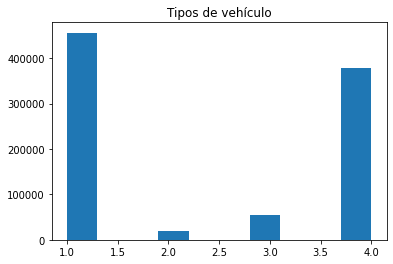

In [88]:
tipo_revision = df[df['tipo_revision_id'] < 5].groupby('tipo_revision_id').size().sort_values(ascending=False)
plt.title('Tipos de vehículo')
plt.hist(tipo_revision.index, weights=tipo_revision.values)

# Combustible

(array([7.85979e+05, 0.00000e+00, 0.00000e+00, 9.74480e+04, 0.00000e+00,
        0.00000e+00, 2.38500e+04, 0.00000e+00, 0.00000e+00, 4.57000e+02]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

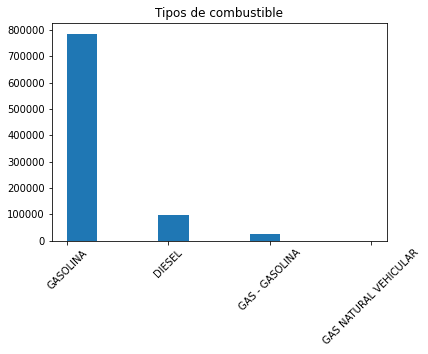

In [90]:
combustible = df.groupby('combustible').size().sort_values(ascending=False).head(4)
plt.xticks(rotation=45)
plt.title('Tipos de combustible')
plt.hist(combustible.index, weights=combustible.values)

## Análisis de los datos de gases

Ahora extraeremos los datos cualitativos de los resultados de la prueba de gases.

In [53]:
# Seleccionaremos para este análisis solo vehículos livianos
livianos_df = df[df['tipo_revision_id'] == 1]
livianos_df.shape

(455948, 34)

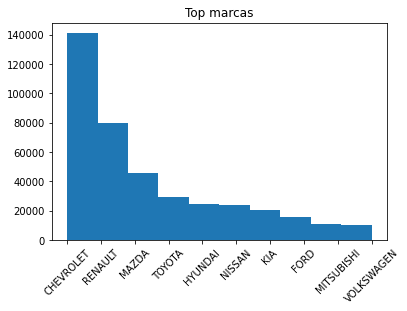

In [81]:
# Seleccione solo las marcas con más datos
top_marcas = livianos_df.groupby('marca').size().sort_values(ascending=False).head(10)
plt.xticks(rotation=45)
plt.title('Top marcas')
plt.hist(top_marcas.index, weights=top_marcas.values)
top_marcas = top_marcas[:5]

(array([18478., 15609.,  7656.,  7532.,  7135.,  6752.,  6241.,  5230.,
         4554.,  4402.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

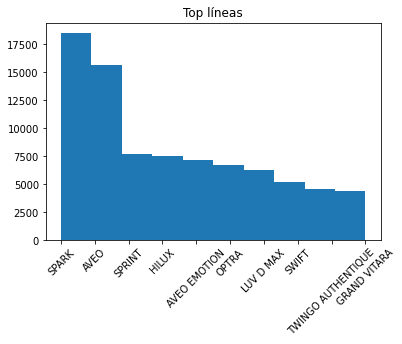

In [82]:
# Seleccione solo las lineas con más datos
top_lineas = livianos_df.groupby('linea').size().sort_values(ascending=False).head(10)
plt.xticks(rotation=45)
plt.title('Top líneas')
plt.hist(top_lineas.index, weights=top_lineas.values)

(907818, 34)

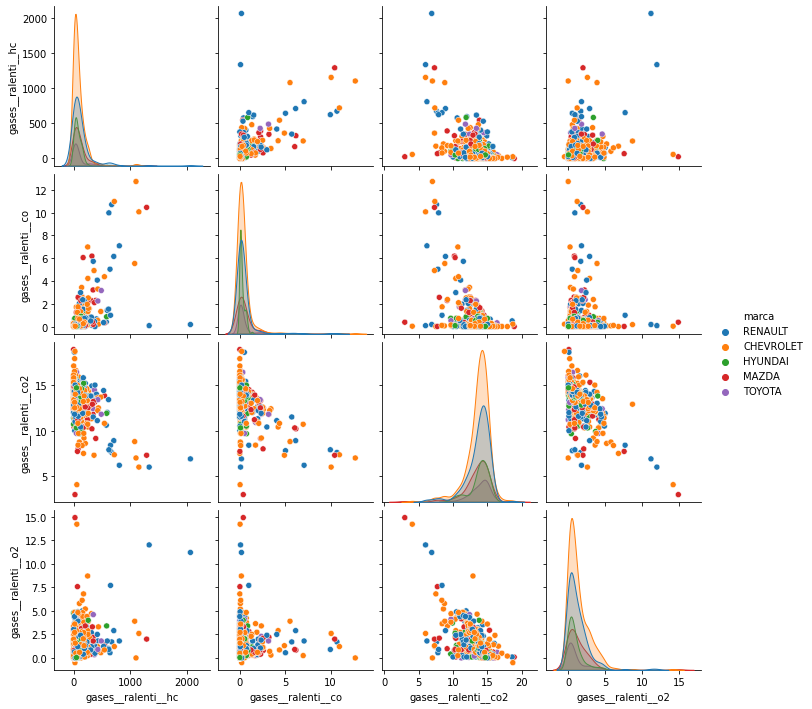

In [28]:
CAMPOS_GASES = [
    'gases__ralenti__hc',
    'gases__ralenti__co',
    'gases__ralenti__co2',
    'gases__ralenti__o2',
    'marca'
]
gases_df2 = df[df['marca'].isin(top_marcas.index)][CAMPOS_GASES].tail(1000)
sns.pairplot(gases_df2, hue='marca')
df.shape

HYUNDAI


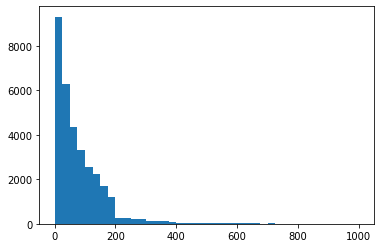

TOYOTA


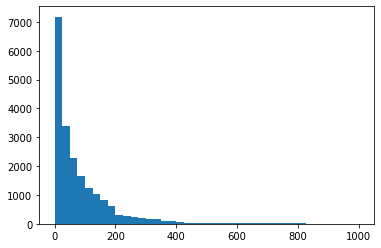

MAZDA


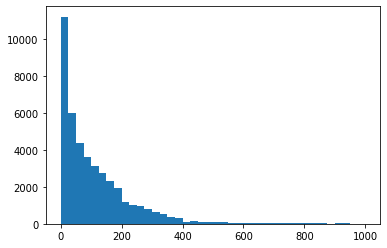

RENAULT


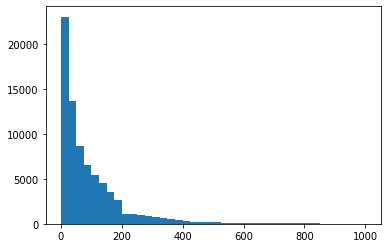

CHEVROLET


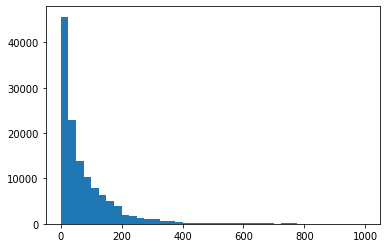

In [29]:
for marca in list(top_marcas.index):
  print(marca)
  plt.hist(df[df['marca'] == marca]['gases__ralenti__hc'], bins=40, range=(0, 1000))
  plt.show()

### Exploración de emisiones por modelo

In [30]:
modelos_nuevos = livianos_df[livianos_df['modelo'] >= 1998]
modelos_nuevos.shape

(357974, 34)

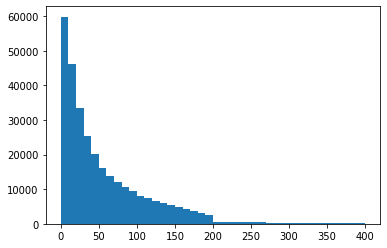

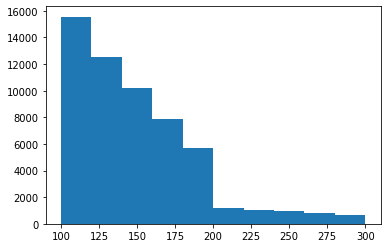

In [31]:
plt.hist(modelos_nuevos['gases__ralenti__hc'], bins=40, range=(0, 400))
plt.show()
plt.hist(modelos_nuevos['gases__ralenti__hc'], range=(100, 300))
plt.show()

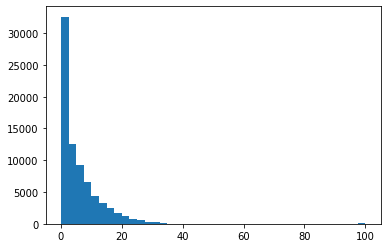

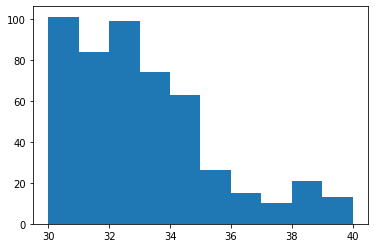

In [32]:
opacidad = df[(df['modelo'] >= 1998) & (df['gases__opacidad_promedio'] > 0)]
plt.hist(opacidad['gases__opacidad_promedio'], bins=40, range=(0,100))
plt.show()
plt.hist(opacidad['gases__opacidad_promedio'], range=(30, 40))
plt.show()

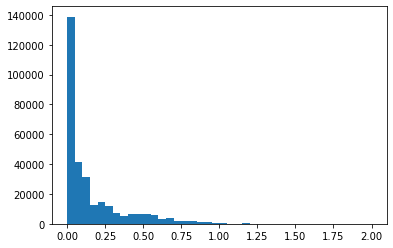

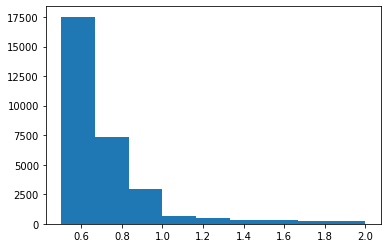

In [33]:
plt.hist(modelos_nuevos['gases__ralenti__co'], bins=40, range=(0, 2))
plt.show()
plt.hist(modelos_nuevos['gases__ralenti__co'], bins=9, range=(0.5, 2))
plt.show()

In [34]:
modelos_2 = livianos_df[(livianos_df['modelo'] < 1998) & (livianos_df['modelo'] >= 1985)]
modelos_2.shape

(77794, 34)

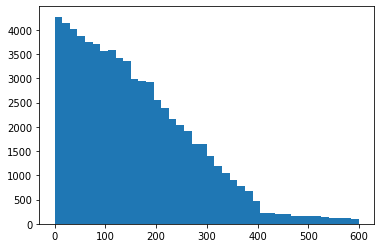

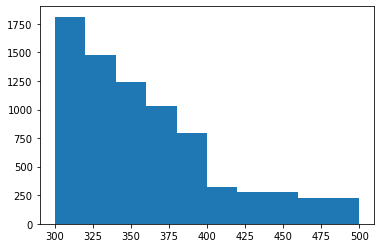

In [35]:
plt.hist(modelos_2['gases__ralenti__hc'], bins=40, range=(0, 600))
plt.show()
plt.hist(modelos_2['gases__ralenti__hc'], range=(300, 500))
plt.show()

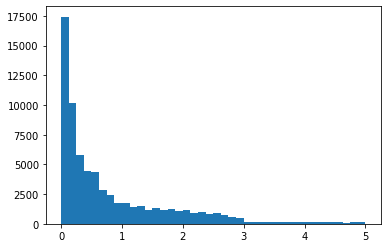

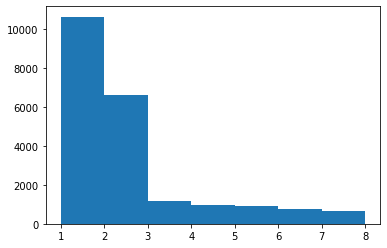

In [36]:
plt.hist(modelos_2['gases__ralenti__co'], bins=40, range=(0, 5))
plt.show()
plt.hist(modelos_2['gases__ralenti__co'], bins=7, range=(1, 8))
plt.show()

In [39]:
motos = df[df['tipo_revision_id'] == 4]
motos.shape

(378981, 34)

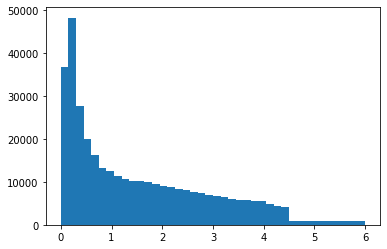

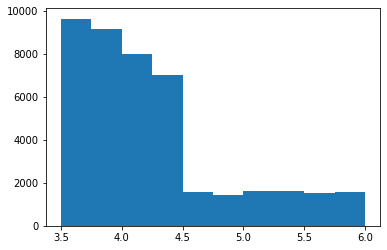

In [40]:
plt.hist(motos['gases__ralenti__co'], bins=40, range=(0, 6))
plt.show()
plt.hist(motos['gases__ralenti__co'], range=(3.5, 6))
plt.show()

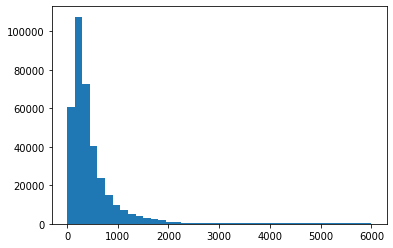

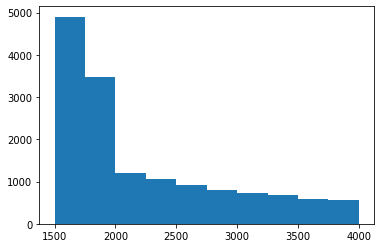

In [41]:
plt.hist(motos['gases__ralenti__hc'], bins=40, range=(0, 6000))
plt.show()
plt.hist(motos['gases__ralenti__hc'], range=(1500, 4000))
plt.show()

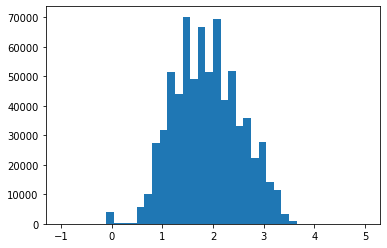

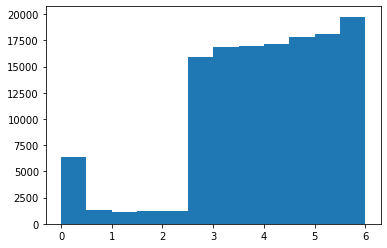

In [45]:
plt.hist(df['luces__inclinacion__baja1_de'], bins=40, range=(-1, 5))
plt.show()
plt.hist(df['luces__intensidad__baja1_de'], bins=12, range=(0, 6))
plt.show()

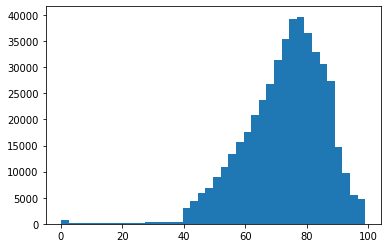

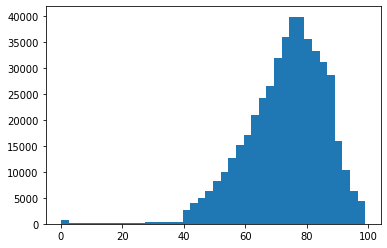

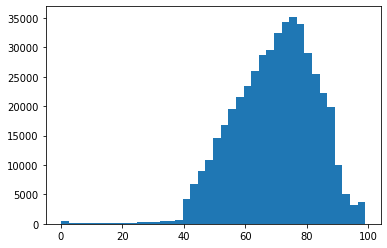

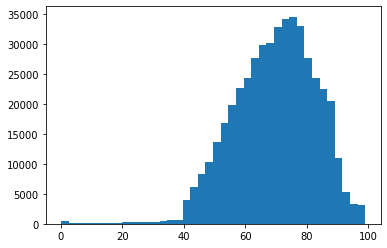

In [48]:
plt.hist(df['adherencia__eje1__de'], bins=40, range=(0, 99))
plt.show()
plt.hist(df['adherencia__eje1__iz'], bins=40, range=(0, 99))
plt.show()
plt.hist(df['adherencia__eje2__de'], bins=40, range=(0, 99))
plt.show()
plt.hist(df['adherencia__eje2__iz'], bins=40, range=(0, 99))
plt.show()

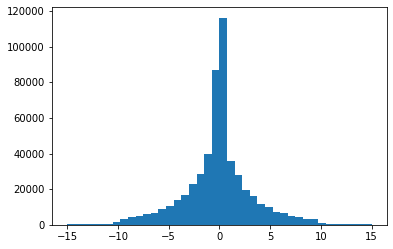

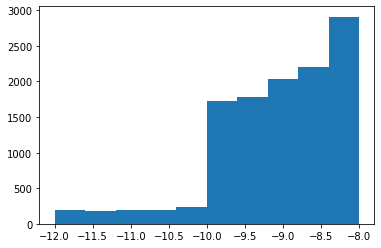

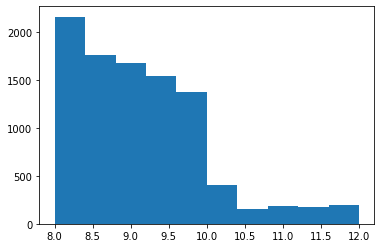

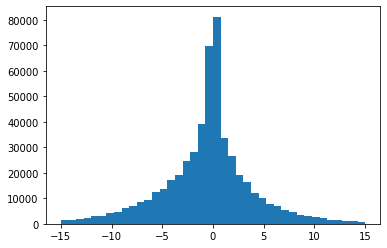

In [47]:
plt.hist(df['desviacion_lateral__eje1'], bins=40, range=(-15, 15))
plt.show()
plt.hist(df['desviacion_lateral__eje1'], range=(-12, -8))
plt.show()
plt.hist(df['desviacion_lateral__eje1'], range=(8, 12))
plt.show()
plt.hist(df['desviacion_lateral__eje2'], bins=40, range=(-15, 15))
plt.show()

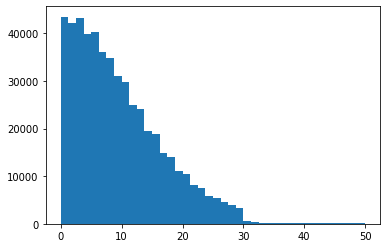

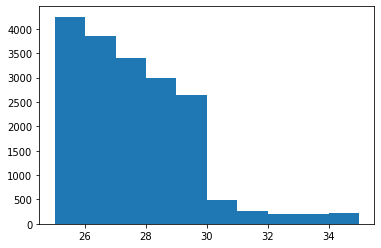

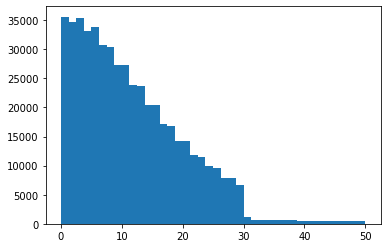

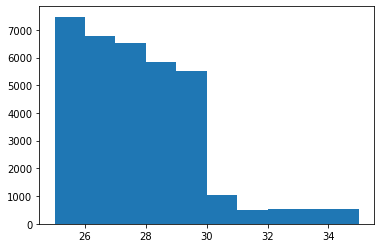

In [49]:
plt.hist(df['frenos__desequilibrio_eje_1'], bins=40, range=(0, 50))
plt.show()
plt.hist(df['frenos__desequilibrio_eje_1'], range=(25, 35))
plt.show()
plt.hist(df['frenos__desequilibrio_eje_2'], bins=40, range=(0, 50))
plt.show()
plt.hist(df['frenos__desequilibrio_eje_2'], range=(25, 35))
plt.show()

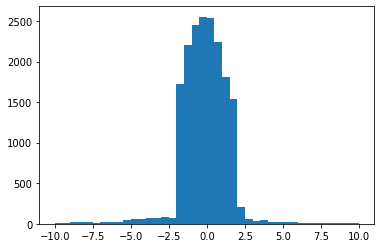

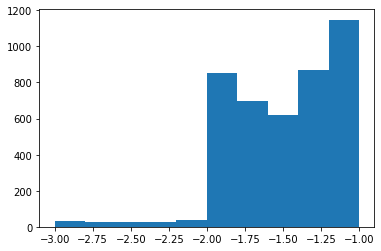

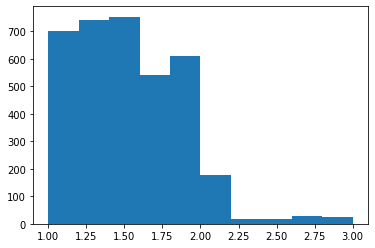

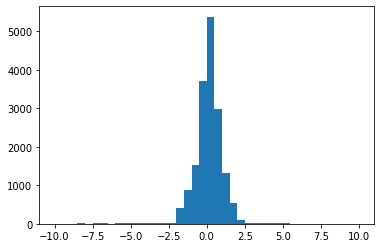

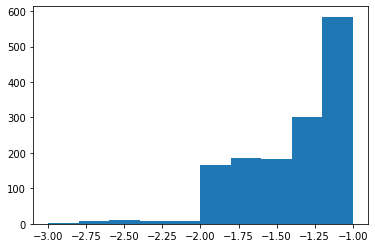

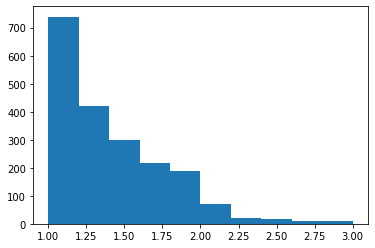

In [50]:
plt.hist(df['taxi__error_distancia'], bins=40, range=(-10, 10))
plt.show()
plt.hist(df['taxi__error_distancia'], range=(-3, -1))
plt.show()
plt.hist(df['taxi__error_distancia'], range=(1, 3))
plt.show()
plt.hist(df['taxi__error_tiempo'], bins=40, range=(-10, 10))
plt.show()
plt.hist(df['taxi__error_tiempo'], range=(-3, -1))
plt.show()
plt.hist(df['taxi__error_tiempo'], range=(1, 3))
plt.show()

In [93]:
data = df[(df['gases__ralenti__hc'] <= 200) & \
          (df['gases__ralenti__hc'] >= 0) & \
          (df['gases__ralenti__co'] <= 1) & \
          (df['gases__ralenti__co'] >= 0) & \
          (df['gases__ralenti__o2'] <= 5) & \
          (df['gases__ralenti__o2'] >= 0) & \
          (df['gases__ralenti__co2'] >= 7) & \
          (df['gases__ralenti__co2'] < 16)]
data = data.sample(frac=0.1)

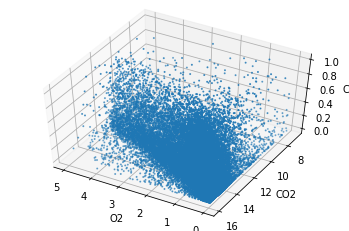

In [103]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('O2')
ax.set_ylabel('CO2')
ax.set_zlabel('CO')

x = data['gases__ralenti__o2']
y = data['gases__ralenti__co2']
z = data['gases__ralenti__co']

ax.scatter(x, y, z, s=1)
ax.view_init(50, 120)

plt.show()

In [104]:
df.shape

(907818, 34)